In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/nero1342/AI4VN.git

Cloning into 'AI4VN'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 146 (delta 42), reused 122 (delta 29), pack-reused 0
Receiving objects: 100% (146/146), 30.36 KiB | 2.02 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [ ]:
%cd /content/AI4VN

/content/AI4VN


In [ ]:
!pip install efficientnet-pytorch==0.7.0
!pip install torch==1.7.0
!pip install torchfile==0.1.0
!pip install torchnet==0.0.4
!pip install torchvision==0.8.1
!pip install ml-collections==0.1.0

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.0-cp36-none-any.whl size=16031 sha256=ed306b29636bec14b827dc90d28c689af6ea54fc4c3bd694a1971ab5431ee86f
  Stored in directory: /root/.cache/pip/wheels/e9/c6/e1/7a808b26406239712cfce4b5ceeb67d9513ae32aa4b31445c6
Successfully built efficientnet-pytorch
  Created wheel for torchfile: filename=torchfile-0.1.0-cp36-none-any.whl size=5711 sha256=d9c949dae52f431a7900196eb48014947f7b4d8876b115e7a6397a50cb334d73
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built torchfile
     |████████████████████████████████| 686kB 20.0MB/s 
     |████████████████████████████████| 204kB 42.6MB/s 
  Created wheel for torchnet: filename=torchnet-0.0.4-cp36-none-any.whl size=29747 sha256=25100bf63f6a43e3ee65934f2cb63be1bd30d8a5924bead9d73e58e75e13fed8
  Stored in directory: /root/.cache/pip/wheels/e1/03/fb/1c212c2f20905cdf97fe39022946cf16b8e66ed754a6663400
  Create

Structure folder dataset like:

folder

----label1

----------file

----label2

----------file

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
#Training
# gdd.download_file_from_google_drive(file_id='1HellNNR8dgI6df_VtXImINPMrZ3wcgI0',
#                                     dest_path='./data.zip',
#                                     unzip=True, showsize = True)


# # Test lite 
# gdd.download_file_from_google_drive(file_id='1ipe37ABQmHSJILSfD2zvpFGXfd2kvTfK',
#                                     dest_path='test_data/data_test.zip',
#                                     unzip=True, showsize = True)

#Test full 
gdd.download_file_from_google_drive(file_id='1QnExHN2MGDxgORs8ppCUhAW8ZZuXU8ch',
                                    dest_path='test_data/data_test2.zip',
                                    unzip=True, showsize = True)
!rm /content/AI4VN/test_data/data_test2.zip

# gdd.download_file_from_google_drive(file_id='1GCoy6MMpi2KuOpyV4kekzEtMQRBSUfcF',
#                                     dest_path='./data_noise.zip',
#                                     unzip=True, showsize = True)


# gdd.download_file_from_google_drive(file_id='1caKmYRLipuv153A-Jb8cy1goVxPNRaRc',
#                                     dest_path='./data_val.zip',
#                                     unzip=True, showsize = True)

# 1WOPCOVA5fYT4ueUO6H5Eih6bBxAXnMsf
gdd.download_file_from_google_drive(file_id='1WOPCOVA5fYT4ueUO6H5Eih6bBxAXnMsf',
                                    dest_path='test_data/test.zip',
                                    unzip=False, showsize = True)

1.8 GiB Done.
Unzipping...Done.


In [ ]:
!unzip -P khoa3101 test_data/test.zip

Archive:  test_data/test.zip
   creating: Wallpaper/
  inflating: Wallpaper/willian-justen de vasconcellos-4hMET7vYTAQ.jpg  
  inflating: Wallpaper/.DS_Store     
  inflating: Wallpaper/james-donovan-0ZBRKEG_5no.jpg  
  inflating: Wallpaper/anders-jildén-5sxQH0ugTaA.jpg  
  inflating: Wallpaper/alberto-restifo-Ni4NgA64TFQ.jpg  


In [ ]:
import shutil 
shutil.unpack_archive('/content/drive/MyDrive/AI4VN/test_set_A_full.zip', 
                      'test_data', 'zip')

In [ ]:
import pandas as pd 
import os 
from pathlib import Path 
from tqdm import tqdm 
from PIL import Image

def create_csv(path_folder, csv_target):
  path = path_folder # "/content/AI4VN/ai4vn_2020/sample_data"
  file_fail = []
  csv_file = csv_target # "/content/AI4VN/train.csv"

  df = pd.DataFrame(columns = ['filename', 'label']) 
  for i, label in enumerate(sorted(Path(path).iterdir())):    
      cnt = 0
      for file in tqdm(sorted(label.iterdir())):
          if str(file).find('DS_Store') == -1:
            try:
              im = Image.open(str(file)).convert("RGB")
              cnt += 1
              df = df.append({'filename': file, 'label': i}, ignore_index =True)
            except:
              file_fail.append(str(file)[str(file).rfind('/') + 1:])
              pass
      print(i, label, cnt)
  df.to_csv(csv_file, index = False)
  return file_fail

In [ ]:
#create_csv("/content/AI4VN/data", "/content/AI4VN/train.csv")
#create_csv("/content/AI4VN/ez_unlimited", "/content/AI4VN/val.csv")
create_csv("/content/AI4VN/Test", "/content/AI4VN/test.csv")

100%|██████████| 5/5 [00:00<00:00, 2190.47it/s]

0 /content/AI4VN/Test/testset_2 0


['03794.png', '06055.png', '10188.png', '11441.png', '26387.jpg']

# Pretrain for Vision Transformer 

In [ ]:
%cd AI4VN

[Errno 2] No such file or directory: 'AI4VN'
/content/AI4VN


In [ ]:
!wget https://storage.googleapis.com/vit_models/imagenet21k+imagenet2012/ViT-B_16-224.npz

--2020-11-28 00:39:00--  https://storage.googleapis.com/vit_models/imagenet21k+imagenet2012/ViT-B_16-224.npz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.128, 173.194.69.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 346335542 (330M) [application/octet-stream]
Saving to: ‘ViT-B_16-224.npz’

ViT-B_16-224.npz    100%[===================>] 330.29M   285MB/s    in 1.2s    

2020-11-28 00:39:02 (285 MB/s) - ‘ViT-B_16-224.npz’ saved [346335542/346335542]



# Test

In [ ]:
!python test.py --config configs/val/test.yaml --gpus 0

{ 'dataset': {'batch_size': 32, 'csv': 'test.csv', 'num_workers': 8},
  'id': 'vitb16-sgd-focalloss',
  'model': { 'args': { 'extractor_cfg': { 'args': { 'pretrained': 'ViT-B_16-224.npz',
                                                    'version': 'ViT-B_16'},
                                          'name': 'VisionTransformer'},
                       'nclasses': 9},
             'name': 'BaselineClassifier'},
  'pretrained': '/content/drive/MyDrive/AI4VN/runs2/vit-b16-sgd-focal-supertrainingset_ver_full-2020_11_27-17_40_50/best_metric_AverageAccuracy.pth',
  'seed': 42,
  'threshold': 0.5}
Hello
100% 1/1 [00:02<00:00,  2.14s/it]


In [ ]:
config = { 'dataset': {'batch_size': 64, 'csv': 'test.csv', 'num_workers': 8},
  'id': 'vit-b16-sgd-focal-supertrainingset_ver_full',
  'model': { 'args': { 'extractor_cfg': { 'args': { 'pretrained': 'ViT-B_16-224.npz',
                                                    'version': 'ViT-B_16'},
                                          'name': 'VisionTransformer'},
                       'nclasses': 9},
             'name': 'BaselineClassifier'},
  'pretrained': '/content/drive/MyDrive/AI4VN/runs2/vit-b16-sgd-focal-supertrainingset_ver_full-2020_11_27-17_40_50/best_metric_AverageAccuracy.pth',
  'seed': 42,
  'threshold': 0.5}

In [ ]:

config["pretrained"] = '/content/drive/MyDrive/AI4VN/runs2/vit-b16-sgd-focal-supertrainingset_ver_full-2020_11_27-17_40_50/best_metric_AverageAccuracy.pth'

In [ ]:
import torch
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torchvision.transforms as tvtf
from tqdm import tqdm
import yaml 
from datasets.image_folder import ImageFolderDataset
from utils.getter import get_instance
from utils.device import move_to
import pprint
import argparse
import pandas as pd 

assert config is not None, "Do not have config file!"

pprint.PrettyPrinter(indent=2).pprint(config)


# Device
dev_id = 'cuda:{}'.format(0) 

device = torch.device(dev_id)

pretrained_path = config["pretrained"]

pretrained = None
if (pretrained_path != None):
    pretrained = torch.load(pretrained_path, map_location=dev_id)
    for item in ["model"]:
        config[item] = pretrained["config"][item]

# 2: Define network
model = get_instance(config['model']).to(device)

# Train from pretrained if it is not None
if pretrained is not None:
    model.load_state_dict(pretrained['model_state_dict'])
    



{ 'dataset': {'batch_size': 64, 'csv': 'test.csv', 'num_workers': 8},
  'id': 'vit-b16-sgd-focal-supertrainingset_ver_full',
  'model': { 'args': { 'extractor_cfg': { 'args': { 'pretrained': 'ViT-B_16-224.npz',
                                                    'version': 'ViT-B_16'},
                                          'name': 'VisionTransformer'},
                       'nclasses': 9},
             'name': 'BaselineClassifier'},
  'pretrained': '/content/drive/MyDrive/AI4VN/runs2/vit-b16-sgd-focal-supertrainingset_ver_full-2020_11_27-17_40_50/best_metric_AverageAccuracy.pth',
  'seed': 42,
  'threshold': 0.5}
Hello


In [ ]:
!rm -rf /content/AI4VN/EzTop1/*

In [ ]:
gdd.download_file_from_google_drive(file_id='1TKx6NawiySiBmMnDnz9Pf5AITVYmYw7S',
                                    dest_path='test_data/b0.zip',
                                    unzip=False, showsize = True)

#https://drive.google.com/file/d/1TKx6NawiySiBmMnDnz9Pf5AITVYmYw7S/view?usp=sharing

Done.


In [ ]:
!cp -r /content/drive/MyDrive/AI4VN/data/AI4VN_test_set /content/AI4VN

In [ ]:
count = 7

In [ ]:
!rm -rf Test/*
!rm -rf EzTop1/*
!unzip -q -P 'bdad03534d74f5c6' /content/AI4VN/AI4VN_test_set/testset_b9.zip -d '/content/AI4VN/Test'
file_fail = create_csv("/content/AI4VN/Test/", "/content/AI4VN/test.csv")
print(file_fail)


 99%|█████████▉| 2980/3000 [00:54<00:00, 54.31it/s]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "

100%|██████████| 3000/3000 [00:54<00:00, 54.82it/s]

0 /content/AI4VN/Test/testset_10 2998
['37589.jpg', '41350.jpg']


In [ ]:
dataset = ImageFolderDataset(config['dataset']['csv'])
dataloader = DataLoader(dataset, batch_size=config['dataset']['batch_size'], num_workers = 8)

print("Turn B{}".format(count))

label = []
conff = []
filename = []
filename2 = []
df = dataset.df
for a, b in df.iterrows():
    filename.append(b['filename'][b['filename'].rfind('/') + 1:])
    #filename2.append(b['filename'])

probs_ls = [] 
  
with torch.no_grad():
    model.eval()
    for i, (imgs, fns) in enumerate(tqdm(dataloader)):
        imgs = move_to(imgs, device)
        logits = model(imgs)
        probs = F.softmax(logits, dim=1)
        confs, preds = torch.max(probs, dim=1)
        for lbl, conf, prob in zip(preds, confs, probs):
            label.append(int(lbl))
            conff.append(conf.cpu().numpy())
            probs_ls.append(prob.cpu().numpy())
        #break
with open('/content/drive/MyDrive/AI4VN/EzTop1/ro_{}_visualize.csv'.format(count), "w") as f:
  print("filename,label,conf",file = f)
  for i in range(len(label)):
    print(filename[i], label[i], conff[i], sep = ',', file = f)
  f.close()  
with open('EzTop1/' + str(count).zfill(2) + '_' +  config['id'] + '.txt', "w") as f:
  for i in range(len(file_fail)):
    print(file_fail[i], '0', sep = '\t', file = f)
  for i in range(len(label)):
    lbl = label[i] if conff[i] >= config['threshold'] else 0
    print(filename[i], lbl, sep = '\t', file = f)
  f.close() 
count += 1 

Turn B9



 70%|███████   | 33/47 [00:24<00:04,  2.99it/s]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "

100%|██████████| 47/47 [00:29<00:00,  1.60it/s]


In [ ]:
with open('/content/drive/MyDrive/AI4VN/EzTop1/ro_{}_visualize.csv'.format(count), "w") as f:
  print("filename,label,conf",file = f)
  for i in range(len(label)):
    print(filename[i], label[i], conff[i], sep = ',', file = f)
  f.close() 

In [ ]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()
 
def denormalize(x):
    """Scale image to range 0..1 for correct plot"""
    x_max = np.percentile(x, 98)
    x_min = np.percentile(x, 2)    
    x = (x - x_min) / (x_max - x_min)
    x = x.clip(0, 1)
    return x


192
/content/AI4VN/Ro/1/01633.jpg 1 0.99998164


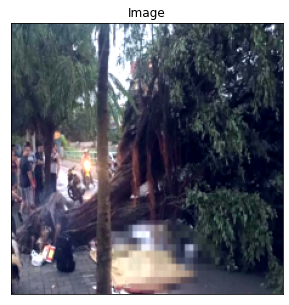

/content/AI4VN/Ro/1/02881.jpg 1 0.99676764


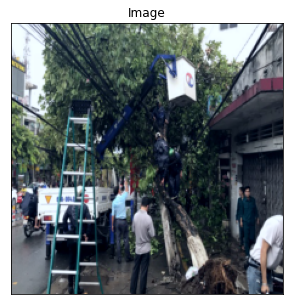

/content/AI4VN/Ro/1/05645.jpg 1 0.99998915


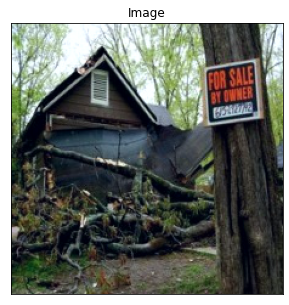

/content/AI4VN/Ro/1/00491.jpg 1 0.9998733


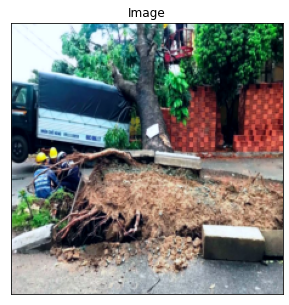

/content/AI4VN/Ro/1/01059.jpg 1 0.99980956


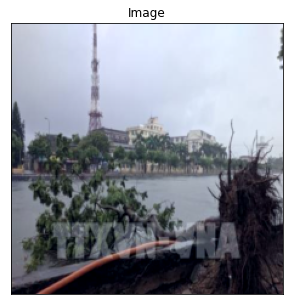

/content/AI4VN/Ro/1/08045.jpg 1 0.9999696


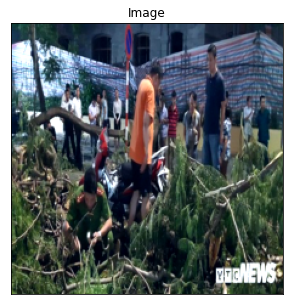

/content/AI4VN/Ro/1/04675.jpg 1 0.99999905


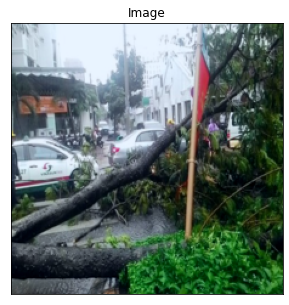

/content/AI4VN/Ro/1/07282.jpg 1 0.99970883


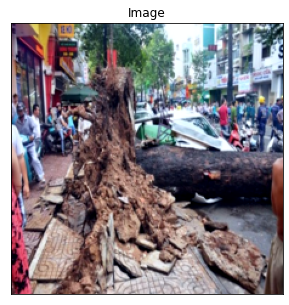

/content/AI4VN/Ro/1/00023.jpg 1 1.0


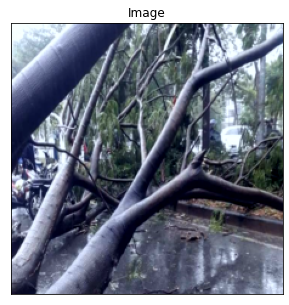

/content/AI4VN/Ro/1/05537.jpg 1 0.9997055


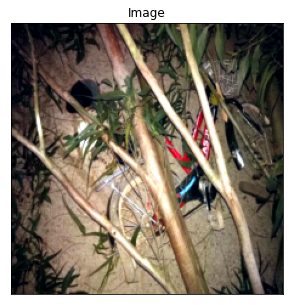

In [ ]:

from importlib import reload  
import numpy as np 
import datasets.image_folder 
import matplotlib.pyplot as plt

reload(datasets.image_folder)
from datasets.image_folder import ImageFolderDataset 
dataset = ImageFolderDataset('/content/drive/MyDrive/AI4VN/EzTop1/visualize.csv')
filename = dataset.df['filename']
conff = dataset.df['conf']
print(len(dataset))
n = 10
ids = np.random.choice(np.arange(len(dataset)), size=n)
#ids = [51, 60, 65, 70, 75]
for i in ids:
    
    image, lbl = dataset[i]
    image = image.cpu().numpy().transpose(1, 2, 0)
    print(filename[i], lbl, conff[i])
    image = np.expand_dims(image, axis=0)
    
    visualize(
        image=denormalize(image.squeeze()),
        #gt_mask=gt_mask.squeeze(),
        #pr_mask=pr_mask.squeeze(),
    )

In [ ]:
!nvidia-smi

Sat Nov 28 03:04:11 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    37W / 300W |   2973MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------